In [1]:
# Load
import matplotlib.pyplot as plt
import pandas as pd

raw_ohlcv = pd.read_csv("./data/ohlcv.csv", index_col=0, low_memory=False)
raw_ohlcv.head(3)

,open,high,low,close,volume,change,stock_code
date,,,,,,,
2019-01-21,9660,9820,9650,9750,65445,0.011411,000020
2019-01-22,9750,9860,9660,9800,42143,0.005128,000020
2019-01-23,9840,9880,9740,9820,31492,0.002041,000020


In [2]:
multi_ohlcv = raw_ohlcv.copy()

_stock_code = raw_ohlcv["stock_code"].sample(1).iloc[0]
single_ohlcv = raw_ohlcv[raw_ohlcv["stock_code"] == _stock_code].copy()
single_ohlcv.index = pd.to_datetime(single_ohlcv.index)

In [3]:
from pa_tools.generators.price_based_generator import PriceBasedPositionGenerator
from pa_tools.generators.highlow_based_generator import HighLowBasedPositionGenerator

pb_pg = PriceBasedPositionGenerator()
hlb_pg = HighLowBasedPositionGenerator()

from pa_tools.models.position_rank_index import PositionRankIndexModel
from pa_tools.models.position_limit import PositionLimitModel

pri_model = PositionRankIndexModel()
pl_model = PositionLimitModel()

In [4]:
time_size = 90
position_size = 300
prices = single_ohlcv["close"]

pb_raw_position = pb_pg.get_raw_position(prices, time_size, position_size)
pb_raw_position

[1174,
 1239,
 1173,
 1231,
 1229,
 1239,
 1164,
 1202,
 1057,
 1231,
 1174,
 1226,
 1173,
 1175,
 1199,
 1114,
 1220,
 1175,
 1219,
 1127,
 1229,
 1173,
 1172,
 1114,
 1227,
 1164,
 1224,
 1234,
 1224,
 1167,
 1224,
 1180,
 1176,
 1173,
 1127,
 1057,
 1217,
 1174,
 1172,
 1175,
 1188,
 1206,
 1220,
 1220,
 1193,
 1229,
 1213,
 1105,
 1219,
 1225,
 1175,
 1229,
 1175,
 1080,
 1180,
 1211,
 1226,
 1227,
 1130,
 1220,
 1220,
 1222,
 1129,
 1164,
 1229,
 1215,
 1200,
 1129,
 1199,
 1234,
 1175,
 1180,
 1227,
 1167,
 1224,
 1230,
 1239,
 1222,
 1172,
 1219,
 1226,
 1220,
 1217,
 1203,
 1188,
 1226,
 1229,
 1211,
 1193,
 1173,
 1196,
 1226,
 1224,
 1224,
 1236,
 1227,
 1080,
 1187,
 1227,
 1196,
 1188,
 1226,
 1229,
 1180,
 1176,
 1231,
 1220,
 1129,
 1222,
 1229,
 1130,
 1234,
 1231,
 1183,
 1213,
 1164,
 1192,
 1080,
 1180,
 1229,
 1172,
 1220,
 1192,
 1211,
 1230,
 1220,
 1172,
 1213,
 1230,
 1220,
 1105,
 1227,
 1226,
 1229,
 1183,
 1129,
 1188,
 1172,
 1174,
 1211,
 1172,
 1226,
 1175,

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def visualize_position(df, positions, price, time_size):
    _df = df.tail(time_size)
    #
    fig = plt.figure(figsize=(12, 6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
    #
    ax1 = plt.subplot(gs[0])
    ax1.plot(_df.index, _df["close"], label="Close")
    ax1.plot(_df.index, _df["high"], label="High", linestyle="--")
    ax1.plot(_df.index, _df["low"], label="Low", linestyle="-.")
    ax1.legend(loc="upper left")
    plt.xticks(rotation=45)
    #
    ax2 = ax1.twinx()
    ax2.bar(
        _df.index,
        _df["volume"],
        label="Volume",
        alpha=0.3,
        color="grey",
    )
    ax2.legend(loc="upper right")
    #
    ax3 = plt.subplot(gs[1])
    sns.kdeplot(positions, fill=True, ax=ax3)
    ax3.axvline(price,linewidth=5,color='k')
    plt.tight_layout()
    plt.show()
    return None

1.0


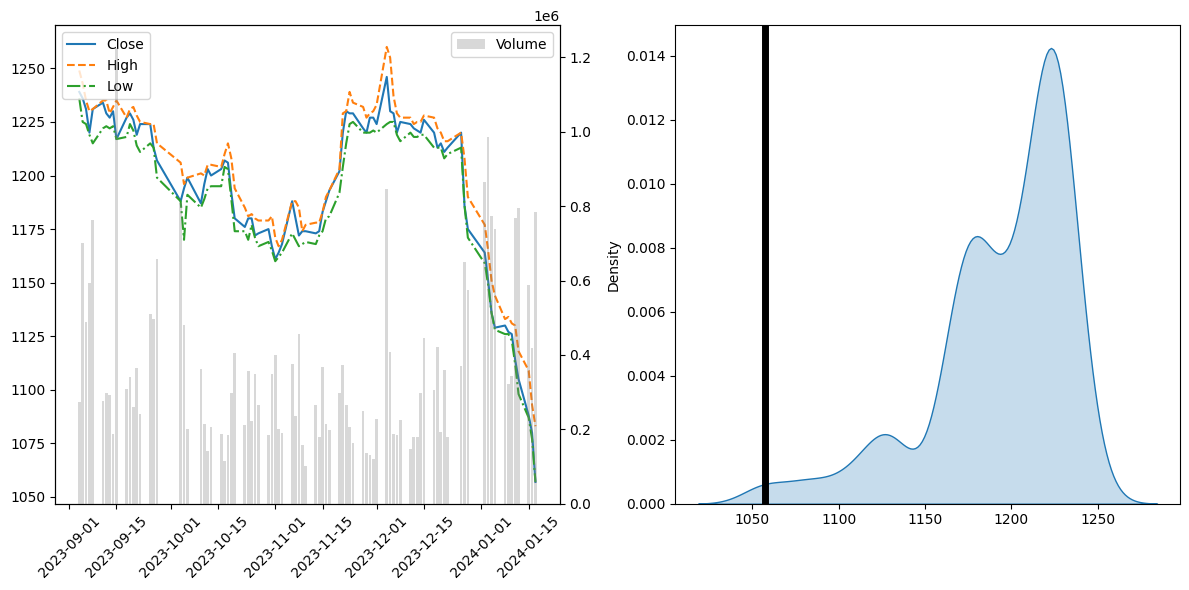

In [6]:
price = single_ohlcv['close'].iloc[-1]
positions = pb_raw_position

pri = pri_model.calc(price, positions)

print(pri)
visualize_position(single_ohlcv, positions, price, time_size)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def visualize_position(df, positions, upper_limit, lower_limit, time_size):
    _df = df.tail(time_size)
    #
    fig = plt.figure(figsize=(12, 6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
    #
    ax1 = plt.subplot(gs[0])
    ax1.plot(_df.index, _df["close"], label="Close")
    ax1.plot(_df.index, _df["high"], label="High", linestyle="--")
    ax1.plot(_df.index, _df["low"], label="Low", linestyle="-.")
    ax1.legend(loc="upper left")
    plt.xticks(rotation=45)
    #
    ax2 = ax1.twinx()
    ax2.bar(
        _df.index,
        _df["volume"],
        label="Volume",
        alpha=0.3,
        color="grey",
    )
    ax2.legend(loc="upper right")
    #
    ax3 = plt.subplot(gs[1])
    sns.kdeplot(positions, fill=True, ax=ax3)
    ax3.axvline(upper_limit,linewidth=5,color='r')
    ax3.axvline(lower_limit,linewidth=5,color='b')
    plt.tight_layout()
    plt.show()
    return None

In [8]:
upper_limit, lower_limit = pl_model.calc(positions)

In [9]:
upper_limit, lower_limit

(1179.73, 1227.26)

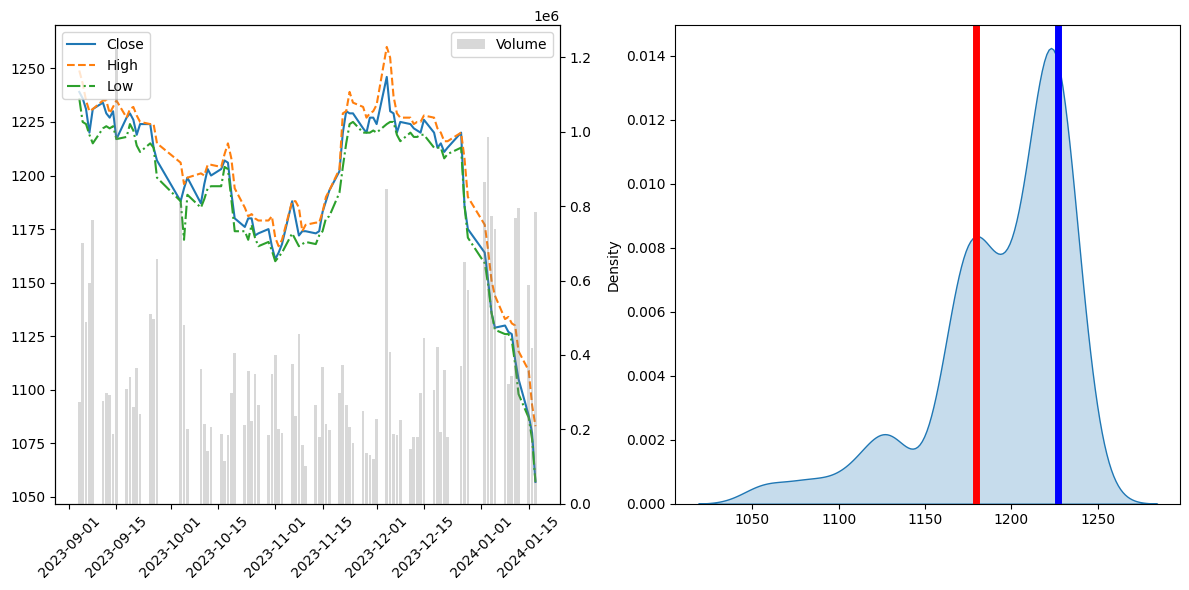

In [10]:
visualize_position(single_ohlcv, positions, upper_limit, lower_limit, time_size)